# Term Deposit Predictor
## Introduction
In this project I analyze the Bank Marketing Data Set as found on the UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Bank+Marketing). It comes from a research article where a team of researchers used this data to create a machine learning model that was able to predict whether or not a client would make a term deposit, based on several features about the clients themselves and previous marketing efforts made by the bank. 

The usefulness of this model is obvious. It allows the bank to make their marketing efforts a lot more efficient by only targeting the clients who would be likely to make a term deposit as predicted by the model. This means less time wasted for both the bank and the clients.

In the research project the model had a final AUC score of 0.80. This was achieved after already eliminating 129 of 150 features that were present in the initial dataset. It was my goal to get as close to this score (or improve it) in 30 hours, using the dataset of 21 features (bank-additional-full.csv) as found on the UCI repository.

The reason I am doing this project is the EliteDataScience Machine Learning Accelerator course. For my Capstone Project I was allowed to choose my own data set and objective. I chose this dataset because it seemed both interesting and well documented. 

In the end I succeeded in matching the AUC score, but was not able to improve on it. It's possible I (or others) might be able to do so in the future. But, it's also possible the limits of this data have been reached and new data is required to further improve the score.

[Moro et al., 2014] S. Moro, P. Cortez and P. Rita. A Data-Driven Approach to Predict the Success of Bank Telemarketing. Decision Support Systems, In press, http://dx.doi.org/10.1016/j.dss.2014.03.001\

Important Note: THE DATA USED IN THE RESEARCH HAS SIGNIFICANT DIFFERENCES WITH THE DATA IN THE UCI REPOSITORY. MANY FEATURES ARE MISSING IN THE REPOSITORY. HOWEVER, THESE FEATURES SEEM TO BE CASE SPECIFIC FACTORS THAT AREN'T NECESSARILY RELEVANT FOR A GENERIC PREDICTION MODEL.

## Library Imports

In [2]:
import numpy as np

import pandas as pd
pd.set_option('display.max_columns', 100)

from matplotlib import pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_style('darkgrid')

# Pickle for saving model files
import pickle

# Import Logistic Regression
from sklearn.linear_model import LogisticRegression

# Import RandomForestClassifier and GradientBoostingClassifer
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

# Function for splitting training and test set
from sklearn.model_selection import train_test_split

# Function for creating model pipelines
from sklearn.pipeline import make_pipeline

# StandardScaler
from sklearn.preprocessing import StandardScaler

# GridSearchCV
from sklearn.model_selection import GridSearchCV

# ROC_AUC_SCORE
from sklearn.metrics import roc_auc_score

C:\Users\Samson\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


## Exploratory Analysis

In this section I aim to get a good feel for the data.

### Basic Information

Let's begin by loading the dataset and having a peek.

In [3]:
raw_df = pd.read_csv('bank-additional-full.csv', sep=';')
raw_df.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
5,45,services,married,basic.9y,unknown,no,no,telephone,may,mon,198,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
6,59,admin.,married,professional.course,no,no,no,telephone,may,mon,139,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
7,41,blue-collar,married,unknown,unknown,no,no,telephone,may,mon,217,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
8,24,technician,single,professional.course,no,yes,no,telephone,may,mon,380,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
9,25,services,single,high.school,no,yes,no,telephone,may,mon,50,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


Looks good. So let me give a general explanation of the data. I won't go into detail as that is already done in the documentation. For an overview of the features see *bank-additional-names.txt*. 

We have here a dataset that contains entries with data about individual calls made during a telemarketing campaign for a term deposit. It contains basic information about the clients themselves, whether or not they had existing accounts and/or loans and when they have been previously contacted. It also contains information about the medium and duration of the call. Finally, we have economic factors at the time of the call such as the consumer confidence and price index and the euribor rate, as well as the number of employees at the time of the call. 

Now, I myself wasn't familiar with the meaning of the employment variation rate and the Euribor. In this case they are both quarterly indicators. The employment variation rate expresses the amount of jobs that are occupied compared to the yearly average. The Euribor rate expresses the interest rate at which European banks loan money to each other. 

The target variable here is the last column, y. It represents whether or not the client ended up signing up for a term deposit as a result of this call. 

For some reason the Euribor rates seem to be multiplied by 10. The values and types for the other features seem to make sense however. 

Moving on. Let's get a look at the shape and feature types of the data.

In [4]:
raw_df.shape

(41188, 21)

There are 41188 observations and 21 features.

In [5]:
raw_df.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

Looks good.

### Distributions

Now lets plot some distributions and see if there's anything weird going on.

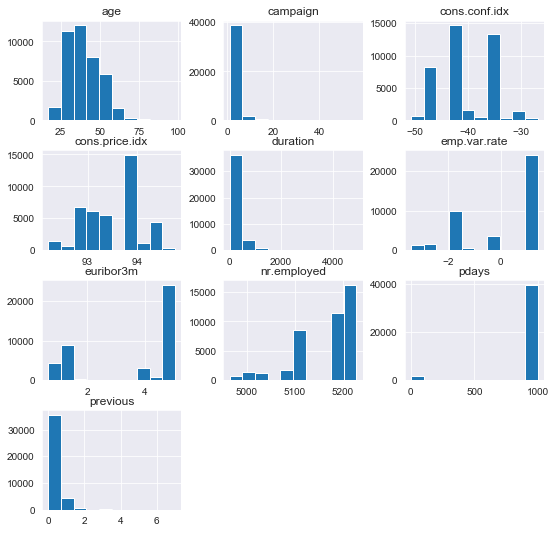

In [6]:
raw_df.hist(figsize=(9,9))
plt.show()

In [7]:
raw_df.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


Nothing weird about the numeric distributions. Values make sense and there is no missing data. 

The 999 values for pdays indicate that there was no previous contact according to the documentation. I don't want this data to be misinterpreted by the algorithms so I will add a flag variable to indicate this later on.

Now let's make some bar plots.

job


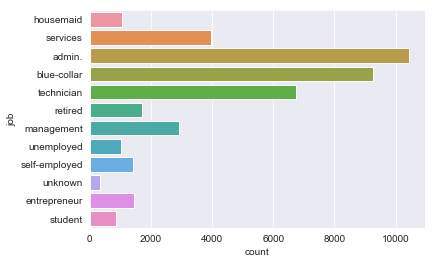

marital


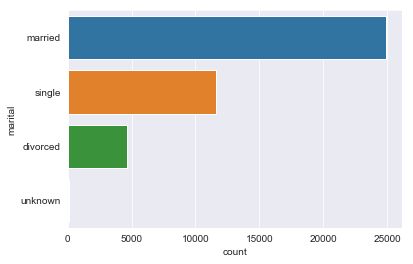

education


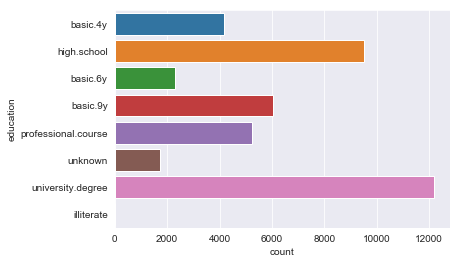

default


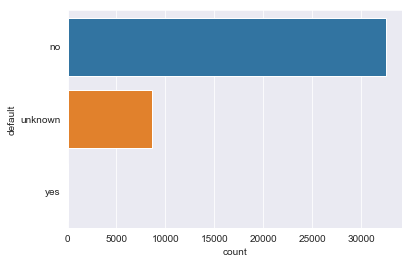

housing


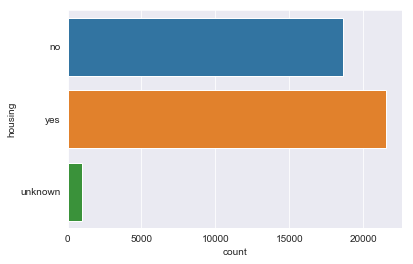

loan


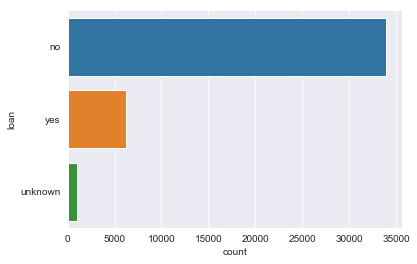

contact


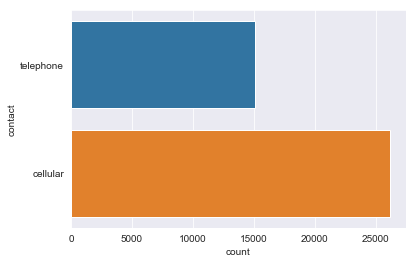

month


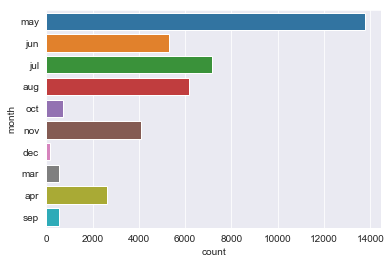

day_of_week


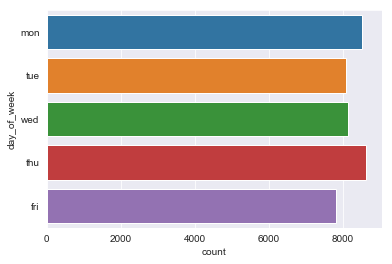

poutcome


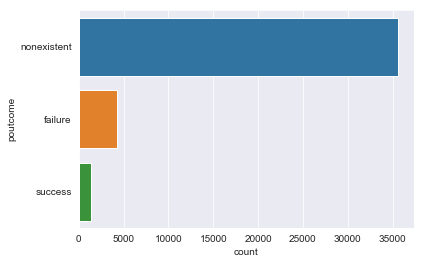

y


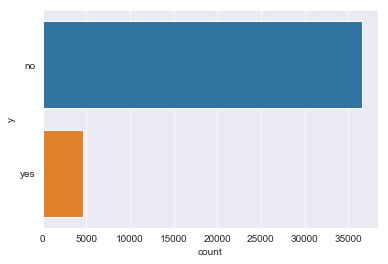

In [8]:
for feature in raw_df.dtypes[raw_df.dtypes == 'object'].index:
    print(feature)
    sns.countplot(y=feature, data=raw_df)
    plt.show()

It seems there are some sparse classes but it's hard to be sure from the plots alone.

In [9]:
raw_df.describe(include="object")

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188,41188
unique,12,4,8,3,3,3,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [10]:
raw_df.marital.value_counts() # Just checking the frequency of the sparse class 'unknown'

married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64

In [11]:
raw_df.education.value_counts() # Just checking the frequency of 'illiterate'

university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64

In [12]:
raw_df.default.value_counts() # Just checking the frequency of 'yes'

no         32588
unknown     8597
yes            3
Name: default, dtype: int64

The only sparse classes (less than 50 observations) are illiterate for education and yes for default. It doesn't seem to make sense to group anything together however.

### Feature Relationships(Segmentations & Correlations)

Now let's make some box plots and examine the correlations.

age


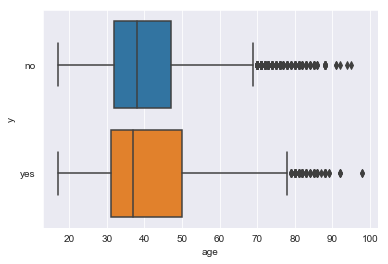

duration


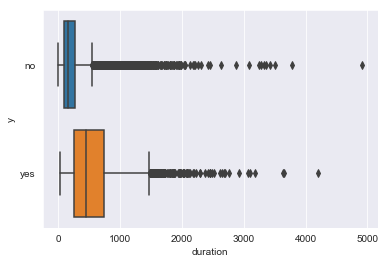

campaign


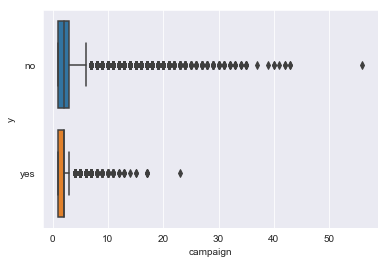

pdays


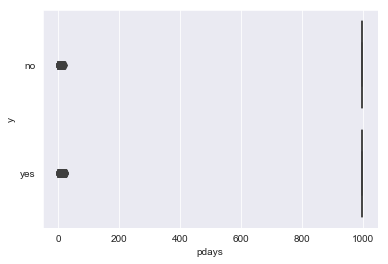

previous


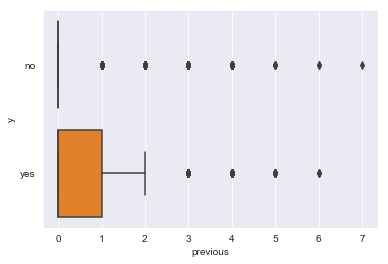

emp.var.rate


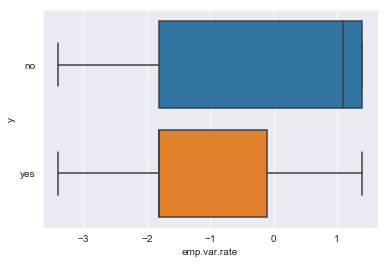

cons.price.idx


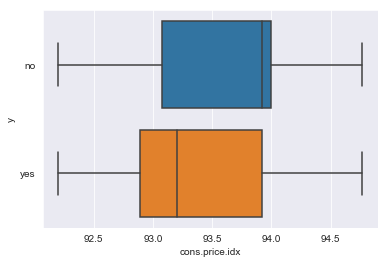

cons.conf.idx


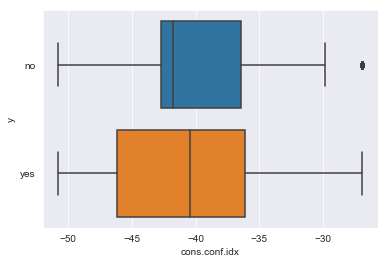

euribor3m


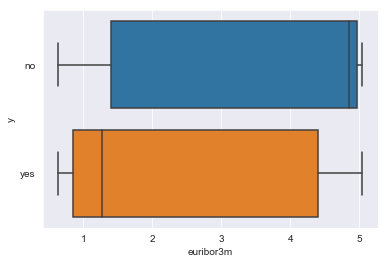

nr.employed


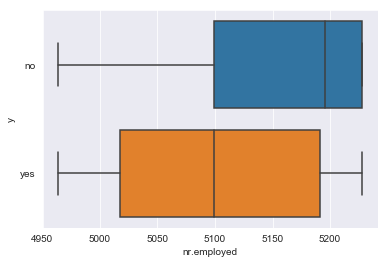

In [13]:
for feature in raw_df.dtypes[raw_df.dtypes != 'object'].index:
    print(feature)
    sns.boxplot(y='y', x=feature, data=raw_df)
    plt.show()

From these segmentations the following things can be observed: 
* The duration of succesful calls was longer, which makes sense. **However, the source stresses that this feature isn't useful in a predictive model, as it is not known how long the call will take in advance! This means it should not be included in the model!!!**
* Unsuccessful calls have a higher average of previous calls, which probably doesn't mean much more than that succesful calls had no follow ups. 
* People who opened a term deposit in general have more often been called in previous campaigns. 
* A higher employment variation rate, consumer price index and euribor all correlate with less succesful calls. In the research paper it is actually noted that the Euribor is actually the most relevant feature, which is surprising. Why should clients care about the interest rate between banks? The segmentation seems to confirm this however. Also surprising is the influence of the employment variation rate. It seems more logical that there would be more succesful calls if employment is higher. However, in the paper they refer to it as the UNemployment rate at times, so perhaps it is the inverse? The consumer price index seems to make sense, however. 
* A higher consumer confidence index has a slightly positive correlation with succes. There is also a bit more deviation in confididence index for succesful calls however. Seems to make sense. Confidence in the economy doesn't necessarily correlate much with term deposit rate. 
* Surprisingly, the number of employees in the company also has a positive correlation with the target variable. Perhaps this has to do with other variables.

Correlation is not necessarily causation however so I shouldn't jump to conclusions.

### Correlations

Now let's take a closer look at those correlations I've already gathered a little about from boxplots.

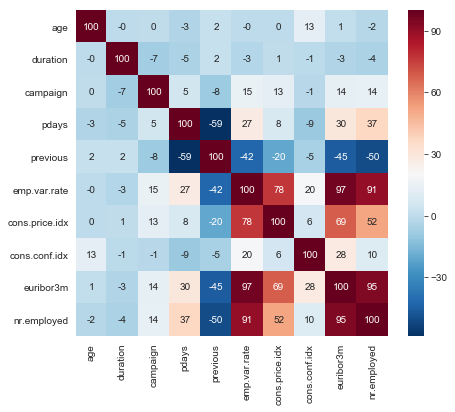

In [14]:
correlations = raw_df.corr()

# Increase the figsize to 7 x 6
plt.figure(figsize=(7,6))

# Plot heatmap of correlations
sns.heatmap(correlations*100, cmap='RdBu_r', annot=True, fmt='0.0f')

plt.show()

There is a strong positive relationship between number of employees and employment variation rate. So employment varation is actually NOT mislabeled unemployment variation, as I suspected earlier. More jobs, less term deposits. Not sure why that is.
The target variable is not numerical so it isn't shown here. However, I can fix that.

In [15]:
num_y_df = raw_df.copy() # Create new dataframe
num_y_df['num_y'] = num_y_df.y.replace({'no' : 0, 'yes' : 1}) # Add new feature with 0 for no and 1 for yes
num_y_df.num_y.unique() # Sanity check

array([0, 1], dtype=int64)

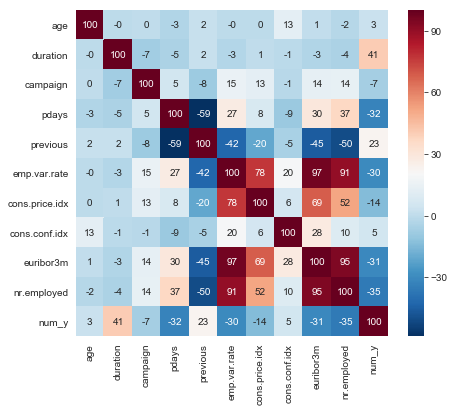

In [16]:
correlations = num_y_df.corr()

# Increase the figsize to 7 x 6
plt.figure(figsize=(7,6))

# Plot heatmap of correlations
sns.heatmap(correlations*100, cmap='RdBu_r', annot=True, fmt='0.0f')

plt.show()

Now we can also see the correlations with our target variable. Surprisingly, in contrast with the statement in the research paper, it is not the Eurobor rate that is the most relevant feature. The most relevant features for the target variable are actually duration (positive), number of employees and pdays (negative). The Eurobor rate is a close 4th place, however. The least relevant features are age, consumer confidence index (like I noticed before) and campaign (number of contacts peformed during this campaign for this client).

### Day of Week

I found an article that asserted that research had pointed out that Wednesdays and Thursdays are the best days to call and am curious how my data feels about that assertion. I already graphed success COUNT for day of week, but that's not the same as success RATE however.

Article: http://www.leadresponsemanagement.org/lrm_study

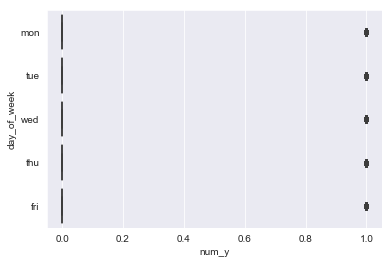

In [17]:
# How to make a plot for day_of_week vs success rate?
sns.boxplot(y='day_of_week', x='num_y', data=num_y_df)
plt.show()

That didn't work well so let's try some other way to find out.

In [18]:
num_y_df[['day_of_week', 'num_y']].groupby('day_of_week').describe()

num_y                                             
              count      mean       std  min  25%  50%  75%  max
day_of_week                                                     
fri          7827.0  0.108087  0.310511  0.0  0.0  0.0  0.0  1.0
mon          8514.0  0.099483  0.299327  0.0  0.0  0.0  0.0  1.0
thu          8623.0  0.121188  0.326364  0.0  0.0  0.0  0.0  1.0
tue          8090.0  0.117800  0.322391  0.0  0.0  0.0  0.0  1.0
wed          8134.0  0.116671  0.321047  0.0  0.0  0.0  0.0  1.0

There appears to be a slight bias towards thursday, wednesday and tuesday. The difference seems small, but when you compare the best to the worst day there IS a 21 percent improvement (0.121/0.994). It also appears that Monday and Friday are the worst days. All in all, the article doesn't appear to be too far off.

## Data Cleaning

Now we have a feel of the data it is time to move on to the next step, cleaning it.

In [19]:
raw_df.shape # A reminder

(41188, 21)

In [20]:
cleaned_df = raw_df.copy()

In [21]:
cleaned_df.drop_duplicates(inplace=True)
cleaned_df.shape

(41176, 21)

It appears the dataset contained 12 duplicates. Not anymore.

In [22]:
cleaned_df.pdays.value_counts().sort_values() # Let's take a closer look at this weird distribution

27         1
20         1
26         1
25         1
21         2
22         3
19         3
18         7
17         8
16        11
0         15
8         18
14        20
15        24
1         26
11        28
13        36
5         46
10        52
12        58
7         60
2         61
9         64
4        118
6        412
3        439
999    39661
Name: pdays, dtype: int64

The bulk of observations has value 999 here. As discussed before, this is code for no previous contact, and it should be flagged. Filling is not necessary, 999 will do and 0 is already used anyways. 

0 days. Apperently they have been calling some customers repeatedly on the same day. Some nerve!

Anyways let's add a flagging feature to indicate that there was (no) previous contact.

In [23]:
cleaned_df['previous_contact'] = (cleaned_df.pdays != 999).astype(int)

cleaned_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_contact
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no,0


In [24]:
cleaned_df.previous_contact.value_counts().sort_values() # Sanity check

1     1515
0    39661
Name: previous_contact, dtype: int64

We can also permanently convert y into a binary variable as we did earlier to check for correlations.

In [25]:
cleaned_df.y = cleaned_df.y.replace({'no' : 0, 'yes' : 1}) # Add new feature with 0 for no and 1 for yes
cleaned_df.y.unique() # Sanity check

array([0, 1], dtype=int64)

contact is a binary categorical variable (cellular and telephone are the only values) that I will also make numeric. This seems a bit weird at first, but it will decrease the amount of features which might slightly improve model performance. And in the end I would have numerical values anyways when I convert al categorical variables into dummy variables. This way I have one instead of two.

In [26]:
cleaned_df.contact = cleaned_df.contact.replace({'cellular' : 0, 'telephone' : 1}) # Add new feature with 0 for no and 1 for yes
cleaned_df.contact.unique() # Sanity check

array([1, 0], dtype=int64)

In [27]:
cleaned_df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_contact
0,56,housemaid,married,basic.4y,no,no,no,1,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,1,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,1,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,no,no,no,1,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,1,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


Nothing else to do here.

## Feature Engineering

The dataset has been cleaned. Moving on to feature engineering and creating our analytical base table (abt). 

Let's immediately get rid of duration, it is not useful to have in the model as it is not known before making the call.

In [28]:
abt = cleaned_df.copy().drop('duration',axis=1)
abt.head(10)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_contact
0,56,housemaid,married,basic.4y,no,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
1,57,services,married,high.school,unknown,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
2,37,services,married,high.school,no,yes,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
3,40,admin.,married,basic.6y,no,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
4,56,services,married,high.school,no,no,yes,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
5,45,services,married,basic.9y,unknown,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
6,59,admin.,married,professional.course,no,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
7,41,blue-collar,married,unknown,unknown,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
8,24,technician,single,professional.course,no,yes,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0
9,25,services,single,high.school,no,yes,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0


I found research (https://ieeexplore.ieee.org/document/8215961) that indicated that custumers with a minimum of secondary school education are good prospects to be to be targeted for term deposit subscriptions. So I will try changing the education variable into a binary variable that indicates this minimum schooling and see what happens.

In [29]:
abt.education.unique()

array(['basic.4y', 'high.school', 'basic.6y', 'basic.9y',
       'professional.course', 'unknown', 'university.degree',
       'illiterate'], dtype=object)

In [30]:
abt["secondary_schooling"] = (abt.education.isin(['high.school', 'university.degree', 'professional.course'])).astype(int)

Another thing to try is to make an indicator for entrepreneurial/leadership jobs. Lets call it 'leadership'.

In [31]:
abt.job.unique()

array(['housemaid', 'services', 'admin.', 'blue-collar', 'technician',
       'retired', 'management', 'unemployed', 'self-employed', 'unknown',
       'entrepreneur', 'student'], dtype=object)

In [32]:
abt['leadership'] = (abt.job.isin(['entrepreneur', 'self-employed', 'management'])).astype(int)

And to top it of, a combination indicator for both features, smart_leadership

In [33]:
abt['smart_leadership'] = (abt['secondary_schooling'] & abt['leadership']).astype(int)

Also, existing customers are much more likely to take up a new offer from a company (https://www.invespcro.com/blog/customer-acquisition-retention/). So, let's make an indicator feature to distinguish existing customers (has default, housing or loan) from other prospects.

In [34]:
abt['existing_customer'] = (abt['default'].isin(['yes']) | abt['housing'].isin(['yes']) | abt['loan'].isin(['yes'])).astype(int)

In [35]:
abt.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_contact,secondary_schooling,leadership,smart_leadership,existing_customer
0,56,housemaid,married,basic.4y,no,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0
1,57,services,married,high.school,unknown,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0
2,37,services,married,high.school,no,yes,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1
3,40,admin.,married,basic.6y,no,no,no,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0
4,56,services,married,high.school,no,no,yes,1,may,mon,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1


Now let's create the dummy variables and finalize the abt.

In [36]:
abt = pd.get_dummies(abt)
abt.head()

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_contact,secondary_schooling,leadership,smart_leadership,existing_customer,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [37]:
abt.shape

(41176, 67)

Finally, let's also make an abt without feature engineering for comparison.

In [38]:
abt_clean = pd.get_dummies(cleaned_df.copy().drop('duration',axis=1))
abt_clean.head()

,age,contact,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y,previous_contact,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,57,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
2,37,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,40,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,56,1,1,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


In [39]:
abt_clean.shape

(41176, 63)

## Algorithm Selection

Now the abt is complete it is time to select the algoritms that I will use to create the model.

I have chosen to use the Binary Classification (our machine learning task) versions of Logistic Regression, Random Forest and Boosted Tree, because these are the ones I am already familiar with thanks to the course I am doing this project for. 

They have enough flexibility to prevent underfitting. As for overfitting, choosing the right constraints (hyperparameters) will take care of that.

For the Logistic Regression algoritm there will be two variations. The l1 (Lasso) and l2 (Ridge) variant. For these I will have to only tune the penalty strength.

For the Random Forest Classifier I will tune the number of trees, the max amount of features per tree and the amount of samples allowed per leaf.

Finally, for the Gradient Boosted Tree I will tune the number of trees, the learning rate and the max depth of the tree.

## Model Training

Time to train our model. Let's start by creating dictionaries for our pipelines and hyperparameters.

In [40]:
pipelines = {
    'l1' : make_pipeline(StandardScaler(), LogisticRegression(random_state=123, penalty='l1')),
    'l2' : make_pipeline(StandardScaler(), LogisticRegression(random_state=123)),
    'rf' : make_pipeline(StandardScaler(), RandomForestClassifier(random_state=123)),
    'gb' : make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=123))
}

In [41]:
hyperparameters = {
    'l1' : {'logisticregression__C' : [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]},
    'l2' : {'logisticregression__C' : [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
}

hyperparameters['rf'] = {'randomforestclassifier__n_estimators' : [100, 200],
                        'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33],
                        'randomforestclassifier__min_samples_leaf' : [1, 3, 5, 10]
}

hyperparameters['gb'] = {'gradientboostingclassifier__n_estimators' : [100, 200],
                        'gradientboostingclassifier__learning_rate' : [0.05, 0.1, 0.2],
                        'gradientboostingclassifier__max_depth' : [1, 3, 5]
}

Next let's create some useful functions.

In [1]:
# Takes a list of models and test data and prints and returns the scores of the models
def print_scores(fitted_models, X_test, y_test):
    scores = {}    
    for name, model in fitted_models.items():
        proba = model.predict_proba(X_test)
        proba = [prob[1] for prob in proba]
        score = roc_auc_score(y_test, proba)
        scores[name] = score
        print(name, score)        
    return scores

In [2]:
# Takes an analytical basetable and hyperparameter dictionary and returns fitted models
def fit_models(abt, hyperparameters):    
    # Create emtpy dictionary called fitted_models
    fitted_models = {}
    
    X = abt.drop('y', axis=1)
    y = abt.y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=abt.y)
    # Loop through model pipelines
    for model_name, pipeline in pipelines.items():
        # Create CV object
        model = GridSearchCV(pipeline, hyperparameters[model_name], cv=10, n_jobs=-1)

        # Fit model on X_train, y_train
        model.fit(X_train, y_train)

        # Store model in fitted models[name]
        fitted_models[model_name] = model

        # Print '{name} has been fitted'
        print(model_name, 'has been fitted.')
    
    scores = print_scores(fitted_models, X_test, y_test)
    
    return fitted_models, scores

In [3]:
# Get a random subset of size 'size' from a dataset. This was used for testing purposes.
def sample(df, size):
    fraction = size/len(df.index)
    if fraction > 1:
        fraction = 1
    sample = df.sample(frac=fraction, replace=False, random_state=321)    
    return sample

Okay, time to create and fit the models on both the engineered and clean data.

In [50]:
results = {}

print('clean')
results['clean'] = fit_models(abt_clean, hyperparameters)
print('\n')   

print('engineered')
results['engineered'] = fit_models(abt, hyperparameters)
print('\n')

clean
l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.
l1 0.7931619133731573
l2 0.7928651642979825
rf 0.781761366853519
gb 0.7977665005756562


engineered
l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.
l1 0.7931565313402411
l2 0.7891586393277089
rf 0.7861061419464733
gb 0.7979913663344846




The best AUC score for the simply cleaned dataset is the gb at 0.798. The same as the 0.80 as described in the research paper. The best score for the engineered dataset is also the gb at 0.798. It appears my attempts at feature engineering didn't improve the score. At least my data cleaning seems to have done the job however.

But, let's not give up just yet! Perhaps we can get some better results with hyperparameter tuning. To be able to do so, let's see what parameters were used in our winning model.

In [84]:
model = results['engineered'][0]['gb'].best_estimator_
for name in hyperparameters['gb']:
    print( print(name, model.get_params()[name] ) )

gradientboostingclassifier__n_estimators 100
None
gradientboostingclassifier__learning_rate 0.1
None
gradientboostingclassifier__max_depth 3
None


Okay. And what parameters did we try again?

In [86]:
print(hyperparameters['gb'])

{'gradientboostingclassifier__n_estimators': [100, 200], 'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2], 'gradientboostingclassifier__max_depth': [1, 3, 5]}


Interesting. It appears our model actually did better with 100 estimators than it did with 200. So perhaps 200 leads to overfitting. Also, the learning rate that was chosen was the middle value of 0.1. Finally, the max_depth was also a middle value of 3. But, we didn't really try much values here. So perhaps there is more performance to gain by trying out some more hyperparameter options. Let's try it!

In [62]:
# Fits and evaluates a single model for given abt and hyperparameters
def fit_model(model_name, abt, hyperparameters):
    X = abt.drop('y', axis=1)
    y = abt.y
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123, stratify=abt.y)
    
    # Create CV object
    model = GridSearchCV(pipelines[model_name], hyperparameters, cv=10, n_jobs=-1)

    # Fit model on X_train, y_train
    model.fit(X_train, y_train)

    # Print '{name} has been fitted'
    print(model_name, 'has been fitted.')
    
    proba = model.predict_proba(X_test)
    proba = [prob[1] for prob in proba]
    score = roc_auc_score(y_test, proba)
    print(model_name, score)
    
    return model, score
    

In [4]:
# New parameters for the gradient boosted trees algorithm.
hp_plus = {'gradientboostingclassifier__n_estimators' : [10, 50, 100, 200],
            'gradientboostingclassifier__learning_rate' : [0.05, 0.075, 0.1, 0.125, 1.5, 0.2],
            'gradientboostingclassifier__max_depth' : [1, 2, 3, 4, 5] 
}

Let's try it.

In [49]:
print('plus')
results_plus = fit_model('gb', abt, hp_plus)
print('\n')

plus
gb has been fitted.
gb 0.795621723595304




That didn't work either. Perhaps the other models will respond better to hypertuning. So, let's try to improve the score with new hyperparameter options for all the models.

In order to do so effectively, let's also look at the hyperparameters our pipelines have selected for the logistic regression models.

In [12]:
# Load model (I saved these models previously)
with open('engineered_l1.pkl', 'rb') as f:
    l1_model = pickle.load(open('engineered_l1.pkl', 'rb'))

In [46]:
l1_model.get_params()['logisticregression__C']

0.05

In [47]:
# Load model
with open('engineered_l2.pkl', 'rb') as f:
    l2_model = pickle.load(open('engineered_l2.pkl', 'rb'))

In [48]:
l2_model.get_params()['logisticregression__C']

0.01

And the random forest model.

In [49]:
# Load model
with open('engineered_rf.pkl', 'rb') as f:
    rf_model = pickle.load(open('engineered_rf.pkl', 'rb'))

In [50]:
for name in hyperparameters['rf']:
    print( print(name, rf_model.get_params()[name] ) )

randomforestclassifier__n_estimators 100
None
randomforestclassifier__max_features auto
None
randomforestclassifier__min_samples_leaf 10
None


So, based on that information, let's make a new hyperparameter palette. 

In [51]:
# For comparison
for name in hyperparameters:
    print( hyperparameters[name])

{'logisticregression__C': [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
{'logisticregression__C': [0.0001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000]}
{'randomforestclassifier__n_estimators': [100, 200], 'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33], 'randomforestclassifier__min_samples_leaf': [1, 3, 5, 10]}
{'gradientboostingclassifier__n_estimators': [100, 200], 'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2], 'gradientboostingclassifier__max_depth': [1, 3, 5]}


In [52]:
hyperparameters2 = {
    'l1' : {'logisticregression__C' : [0.025, 0.04, 0.05, 0.075, 0.09]}, #Let's pick values around the winning value of 0.05 and in between 0.005 and 0.05
    'l2' : {'logisticregression__C' : [0.0075, 0.009, 0.01, 0.025, 0.04]} # Here as well for 0.01 and in between 0.005 and 0.05
} 

hyperparameters2['rf'] = {'randomforestclassifier__n_estimators' : [50, 100, 150], # let's try less than 100 and in between 100 and 200.
                        'randomforestclassifier__max_features' : ['auto', 'sqrt', 0.33], # Let's keep this the same.
                        'randomforestclassifier__min_samples_leaf' : [6, 9, 10, 11, 15, 20] # Let's try in between 5 and 10 and higher than 10
}

hyperparameters2['gb'] = {'gradientboostingclassifier__n_estimators' : [50, 100, 150], #100
                        'gradientboostingclassifier__learning_rate' : [0.075, 0.09, 0.1, 0.125, 1.5, 0.175], #0.1
                        'gradientboostingclassifier__max_depth' : [2, 3, 4] #3
}

In [53]:
# Sanity Check
for name in hyperparameters2:
    print( hyperparameters2[name])

{'logisticregression__C': [0.025, 0.04, 0.05, 0.075, 0.09]}
{'logisticregression__C': [0.0075, 0.009, 0.01, 0.025, 0.04]}
{'randomforestclassifier__n_estimators': [50, 100, 150], 'randomforestclassifier__max_features': ['auto', 'sqrt', 0.33], 'randomforestclassifier__min_samples_leaf': [6, 9, 10, 11, 15, 20]}
{'gradientboostingclassifier__n_estimators': [50, 100, 150], 'gradientboostingclassifier__learning_rate': [0.075, 0.09, 0.1, 0.125, 1.5, 0.175], 'gradientboostingclassifier__max_depth': [2, 3, 4]}


So now let's try one more time.

In [54]:
print('plus plus')
results_plus_plus = fit_models(abt, hyperparameters2)
print('\n')

plus plus
l1 has been fitted.
l2 has been fitted.
rf has been fitted.
gb has been fitted.
l1 0.7928664913745919
l2 0.7891586393277089
rf 0.7863652905177132
gb 0.7981361651378744




Unfortunately, this didn't improve the score either. Perhaps a different algorithm or an ensemble would be able to improve the score. Or perhaps some more feature engineering. But, perhaps this is just the best this data can do.

Let's save up.

In [66]:
for version in ['clean','engineered']:
    for name, model in results[version][0].items():
        with open((version + '_' + name + '.pkl'), 'wb') as f:
            pickle.dump(model.best_estimator_, f)

In [67]:
abt_clean.to_csv('abt_clean.csv', index=None)

In [69]:
abt.to_csv('abt_engineered.csv', index=None)

In [64]:
abt_test.shape

(4119, 64)

## Insights & Analysis

The model with the best performance on the complete dataset was the Gradient Boosted Tree Model with a performance of 0.798.  This is about the same as the model in the research paper. My attempts at feature engineering did not increase this performance by any significant amount compared to the basic cleaned dataset.

I also did some testing on the incomplete dataset of size 4100 that was included on the UCI repository. In this case the best model performance was the l2 Logistic Regression Model with a performance of 0.84. However, that dataset was too small to give reliable results as there were up to 67 features (varying for different feature engineering attempts). 

A source I found online indicated a minimum dataset size of 10k/p is a good rule of thumb, where k is the amount of features and p the success rate of the target variable. In my case those would be 67 and 0.1 respectively leading to a minimum sample size of 6700. The smaller dataset does not satisfy this requirement, but the full dataset does.

It is unfortunate I couldn't increase the models performance beyond that of the article, but at least I didn't do  any worse either. I spend well over 30 hours trying however, so my end condition has been met, and I am satisfied with the result.

The most important result being that I have learned a lot about applied machine learning. My first challenge was to find a good dataset with clear documentation on the meaning and context of the variables. Something that turned out to be surprisingly hard, and I have learned a lot about the variety of data sources and formats for datasets in my searching efforts.

Also, I found that I had to be a lot more creative with the machine learning workflow and the writing of my code for this project without the guidance of the exercises in the course. For example, I found that I had to come up with good functions as wel as procedures to experiment with different attempts at feature engineering and hyperparameter tuning in order to manage my time. And to be creative to come up with ideas for said attempts at feature engineering and hyperparameter tuning in the first place. And let's not forget the challenge of documenting said messy process in a way that is actually comprehendible to you, the reader.

All in all it was a very instructive, frustrating and fun experience.

With more time and resources I would perhaps try more hyperparameters and/or algorithms. I could also find out more about the banking industry and refine my feature engineering attempts. Finally, I might learn about the creation of ensembles and experiment with that. It's very much possible however that for a further increase in performance more data is required.